In [1]:
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import math
%matplotlib inline
from matplotlib.rcsetup import validate_color

In [2]:
def nlfunction(x):
   return (x**3 + 2*x**2 + 3*x + 1)   

In [3]:
X = torch.rand((1000, 1))
Y = nlfunction(X)

In [4]:
class Gradient(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(10, 1)
        
  def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        validate_color = self.fc4(val)
        return val
        
  

In [5]:
model2 = Gradient()
lossFunc = nn.MSELoss()
opt = optim.Adam(model2.parameters(), lr=0.001)
EPOCHS = 800

In [6]:
# Train Network 
model2Cost = []
gradNormList = []
for index in range(EPOCHS):
    model2.zero_grad()
    output = model2(X)
    cost = lossFunc(output, Y)
    model2Cost.append(cost.detach().numpy())
    cost.backward()
    opt.step() 
    
    # Get gradient norm (From slides)
    gradAll = 0.0
    for p in model2.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        gradAll += grad
    gradNorm = gradAll ** 0.5
    gradNormList.append(gradNorm)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


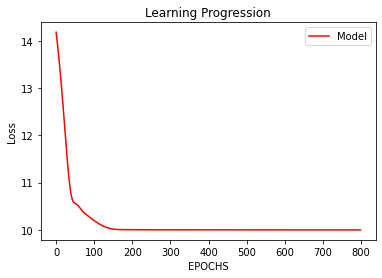

In [7]:
plt.plot(range(EPOCHS), model2Cost, 'r', label='Model')
plt.title("Learning Progression")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.show()

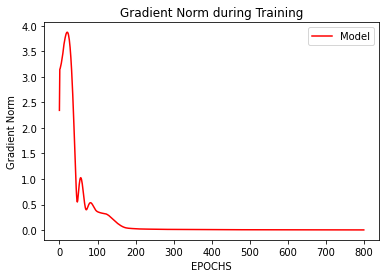

In [8]:
plt.plot(range(EPOCHS), gradNormList, 'r', label='Model')
plt.title("Gradient Norm during Training")
plt.xlabel("EPOCHS")
plt.ylabel("Gradient Norm")
plt.legend()
plt.show()